In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import matplotlib.pyplot as plt
% matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JBC4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
input_file_name = 'nuclear_news.txt'
output_img_name = 'nuclear_news_today.png'
output_file_name = 'nuclear_news_results.xlsx'

In [8]:
#open text file in read mode
text_file = open(input_file_name, "r",encoding="utf8")
 
#read whole file to a string
data = text_file.read()
 
#close file
text_file.close()
 

In [9]:
data = data.lower()
print(data)

human rights panel to hear navajo uranium contamination case: associated press
21 oct 2021 , susan montoya bryan

albuquerque, n.m. — a group representing navajo communities is presenting its case to an international human rights body, saying u.s. regulators violated the rights of tribal members when they cleared the way for uranium mining in western new mexico.
albuquerque, n.m. — a group representing navajo communities is presenting its case to an international human rights body, saying u.s. regulators violated the rights of tribal members when they cleared the way for uranium mining in western new mexico.
the inter-american commission on human rights based in washington, d.c., decided earlier this year that the petition filed a decade ago by eastern navajo diné against uranium mining was admissible. with additional testimony and exhibits being filed thursday, the commission is expected to hold a hearing in the spring.

lawyers for the navajo group said the commission’s decision to h

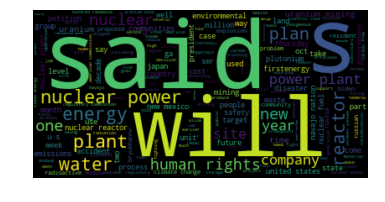

In [10]:
# Display the generated image:
wordcloud = WordCloud().generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
text = data
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [19]:
filtered = ''
filtered_list = []
for word in tokens_without_sw:
    if len(word) > 4 and word.upper() != 'THE' and word.upper() != 'THEY' and word.upper() != 'NUCLEAR' and word.upper() != 'WE' and word.upper() != "U.S." and word.upper() != 'THIS' and word.upper() != 'THEY':
        filtered = filtered + ' ' + word
        filtered_list.append(word)

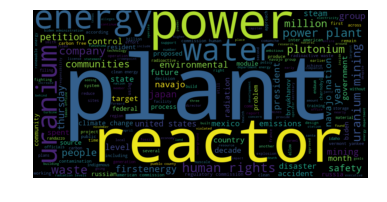

In [20]:
# Display the generated image:
wordcloud = WordCloud(width=1200, height=600).generate(filtered)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
wordcloud.to_file(output_img_name)


In [22]:
df = pd.DataFrame(filtered_list, columns = ['words'])

In [23]:
unique_words = df.words.unique()

In [24]:
unique_word_count = df.words.value_counts()
print(unique_word_count)

power            89
energy           82
plant            72
uranium          65
navajo           50
mining           44
waste            44
rights           43
water            41
human            37
reactor          35
commission       31
would            30
could            29
company          29
reactors         29
years            26
group            25
environmental    24
plants           23
plutonium        23
safety           21
million          20
nation           20
state            20
communities      20
people           19
climate          19
petition         19
thursday         19
                 ..
innovative        1
medium.com        1
fuels-fired       1
shuts             1
sector            1
anything          1
remake            1
resort            1
assigned          1
high-paying       1
decades-long      1
contends          1
violations        1
pleaded           1
faced             1
now-tainted       1
vessels           1
fairly            1
milestone         1


In [25]:
pd.DataFrame(df.words.value_counts()).to_excel(output_file_name) 
